## Изучение общей информации
Путь к файлам:

/datasets/calls.csv. Скачать датасет

/datasets/internet.csv. Скачать датасет

/datasets/messages.csv. Скачать датасет

/datasets/tariffs.csv. Скачать датасет

/datasets/users.csv. Скачать датасет

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import math
from statsmodels.stats import weightstats as stests
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', 50)



Импортируем необходимые библиотеки

In [77]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')



Читаем необходимые файлы. Через фукцию выводим по ним необходимую информацию.

In [78]:
df_list = [calls, internet, messages, tariffs, users]
for df in df_list:
  display(df.head())
  df.info()
  display(df.isna().sum())
  display(df.describe())


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Вывод: в таблице с информацией о звонках "calls" пропущенных значений нет. Нужно поменять тип данных в колонке с датой на соответсвующий. В таблице с информацией об интернет-сессиях также поправить тип даннх с датой, пропущенных нет значений, есть нулевые значения по mb_used, странный столбец Unnamed: 0. В таблице "users" в колонке churn_date отсутствуют данные, тип данных с датой неверный. 

## Подготовка данных
Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных, если они есть.
Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.


### Обработка типов данных и пропусков

Меняем тип данных в колонках с датой на верный.

In [79]:
for df in df_list:
    date_cols = [col for col in df.columns if 'date' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])

Данные в колонке "duration" с длительностью звонка равные 0 не удаляем и не заменяем, в задание оговорено, что это отображаются пропущенные звонки. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

Удаляем столбец Unnamed: 0, о нем информации в задании нет.

In [80]:
internet = internet.drop('Unnamed: 0',axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


??? нули по продолжительности сессии пока не буду удалять

###  Расчеты

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [81]:
print(calls['call_date'].min())
print(calls['call_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


Звонки были в течение 1 года. Создади столбец с месяцем.

In [82]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Округляем минуты в большую сторону согласно тарифу.

In [83]:
calls['duration']=calls['duration'].apply(math.ceil)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Создаем отдельные таблицы с количеством и суммой звонков по месяцам, затем объединим их в одну

In [84]:
calls_month_minutes = calls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc='sum').reset_index()
print(calls_month_minutes[calls_month_minutes['user_id'].isin([1200])])

      user_id  month  duration
1260     1200      4        50
1261     1200      5       454
1262     1200      6       567
1263     1200      7       581
1264     1200      8       627
1265     1200      9       560
1266     1200     10       756
1267     1200     11       708
1268     1200     12       579


In [85]:
calls_month_minutes.isna().sum()

user_id     0
month       0
duration    0
dtype: int64

In [86]:
calls_month_num = calls.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
calls_month_num.columns = ['user_id','month','calls_num']
print(calls_month_num[calls_month_num['user_id'].isin([1200])])

      user_id  month  calls_num
1260     1200      4          8
1261     1200      5         72
1262     1200      6         83
1263     1200      7         86
1264     1200      8         92
1265     1200      9         85
1266     1200     10         99
1267     1200     11         99
1268     1200     12         78


In [87]:
calls_month_num.isna().sum()

user_id      0
month        0
calls_num    0
dtype: int64

In [88]:
calls_month = calls_month_num.merge(calls_month_minutes,how='left',on=['user_id','month'])
print(calls_month[calls_month['user_id'].isin([1200])])

      user_id  month  calls_num  duration
1260     1200      4          8        50
1261     1200      5         72       454
1262     1200      6         83       567
1263     1200      7         86       581
1264     1200      8         92       627
1265     1200      9         85       560
1266     1200     10         99       756
1267     1200     11         99       708
1268     1200     12         78       579


In [89]:
calls_month.isna().sum()

user_id      0
month        0
calls_num    0
duration     0
dtype: int64

#### Количество отправленных сообщений по месяцам

Создаем таблицу с количеством сообщений по месяцам

In [90]:
messages['month']=pd.DatetimeIndex(messages['message_date']).month
messages_month = messages.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
messages_month.columns = ['user_id','month','messages_num']
print(messages_month[messages_month['user_id'].isin([1200])])

      user_id  month  messages_num
1060     1200      4             4
1061     1200      5            53
1062     1200      6            44
1063     1200      7            47
1064     1200      8            49
1065     1200      9            57
1066     1200     10            35
1067     1200     11            51
1068     1200     12            38


In [91]:
messages_month.isna().sum()

user_id         0
month           0
messages_num    0
dtype: int64

#### Объем израсходованного интернет-трафика по месяцам

Создаем сводную таблицу с мегабайтами израсходованного интернета по месяцам, затем переводим объем в гигабайты

In [92]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month
internet['mb_used'] = np.ceil(internet['mb_used'])
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used',aggfunc='sum').reset_index()
print(internet_month[internet_month['user_id'].isin([1200])])

      user_id  month  mb_used
1277     1200      4   4338.0
1278     1200      5  18717.0
1279     1200      6  19316.0
1280     1200      7  16880.0
1281     1200      8  16318.0
1282     1200      9  17853.0
1283     1200     10  17642.0
1284     1200     11  18548.0
1285     1200     12  17988.0


In [93]:
#internet_month['gb_used']=(internet_month['mb_used']/1024).apply(math.ceil)
#internet_month = internet_month.drop('mb_used',axis=1)
print(internet_month[internet_month['user_id'].isin([1200])])

      user_id  month  mb_used
1277     1200      4   4338.0
1278     1200      5  18717.0
1279     1200      6  19316.0
1280     1200      7  16880.0
1281     1200      8  16318.0
1282     1200      9  17853.0
1283     1200     10  17642.0
1284     1200     11  18548.0
1285     1200     12  17988.0


In [94]:
internet_month.isna().sum()

user_id    0
month      0
mb_used    0
dtype: int64

#### Помесячная выручка с каждого пользователя

Вначале создадим таблицу с айди пользователей и тарифом, которым они пользуются.
И таблицу с необходимыми данными пользователей с количеством минут, сообщений и гигабайт интернета


In [95]:
profit = users[['user_id', 'tariff']].copy()
rate = []
for tariff in profit['tariff']:
  if tariff=='smart':
    rate.append(tariffs.loc[tariffs['tariff_name']=='smart', 'rub_monthly_fee'].values[0])
  else:
    rate.append(tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_monthly_fee'].values[0])
profit['monthly_fee']=rate
profit

,user_id,tariff,monthly_fee
0,1000,ultra,1950
1,1001,smart,550
2,1002,smart,550
3,1003,ultra,1950
4,1004,ultra,1950
...,...,...,...
495,1495,ultra,1950
496,1496,smart,550
497,1497,smart,550
498,1498,smart,550


In [96]:
profit.isna().sum()

user_id        0
tariff         0
monthly_fee    0
dtype: int64

In [97]:
all_data = calls_month_minutes[['user_id', 'month', 'duration']]
for df in [messages_month, internet_month]:
    all_data=all_data.merge(df, how='outer', on=['user_id', 'month'])
print(all_data[all_data['user_id'].isin([1350])])

      user_id  month  duration  messages_num  mb_used
2180     1350      8      35.0           2.0   1621.0
2181     1350      9     303.0          42.0  18695.0
2182     1350     10     456.0          55.0  24538.0
2183     1350     11     478.0          60.0  18533.0
2184     1350     12     396.0          56.0  22384.0


Проверим таблицу на пропуски и заменим их на нули.

In [98]:
all_data.isna().sum()

user_id           0
month             0
duration         40
messages_num    497
mb_used          11
dtype: int64

In [99]:
all_data.fillna(0, inplace = True)
all_data.isna().sum()

user_id         0
month           0
duration        0
messages_num    0
mb_used         0
dtype: int64

Объдиним две талицы в одну для наглядности

In [100]:
profit = profit.merge(all_data, how='right', on=['user_id'])
print(profit[profit['user_id'].isin([1200])])

      user_id tariff  monthly_fee  month  duration  messages_num  mb_used
1277     1200  ultra         1950      4      50.0           4.0   4338.0
1278     1200  ultra         1950      5     454.0          53.0  18717.0
1279     1200  ultra         1950      6     567.0          44.0  19316.0
1280     1200  ultra         1950      7     581.0          47.0  16880.0
1281     1200  ultra         1950      8     627.0          49.0  16318.0
1282     1200  ultra         1950      9     560.0          57.0  17853.0
1283     1200  ultra         1950     10     756.0          35.0  17642.0
1284     1200  ultra         1950     11     708.0          51.0  18548.0
1285     1200  ultra         1950     12     579.0          38.0  17988.0


In [101]:
profit.isna().sum()

user_id         0
tariff          0
monthly_fee     0
month           0
duration        0
messages_num    0
mb_used         0
dtype: int64

Рассчитываем сумму по перерасходованным минутам звонков, количеству смс и гигабайтам интернета, согласно тарифу каждого пользователя.

In [102]:
def extra_mins_fee(row):
  duration = row['duration']
  tariff = row['tariff']
  free_mins_s=tariffs.loc[tariffs['tariff_name']=='smart', 'minutes_included'].values[0]
  free_mins_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'minutes_included'].values[0]
  fix_mins_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_minute'].values[0]
  fix_mins_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_minute'].values[0]
  extra_mins_fee=0
  if row['tariff'] == 'smart':
    extra_mins_fee=max(duration - free_mins_s,0)*fix_mins_s
    return extra_mins_fee
  else:
    extra_mins_fee=max(duration - free_mins_u,0)*fix_mins_u
    return extra_mins_fee

profit['extra_mins_fee'] = profit.apply(extra_mins_fee, axis = 1)
profit.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_num,mb_used,extra_mins_fee
2,1000,ultra,1950,7,340.0,75.0,14016.0,0.0
1958,1308,smart,550,11,197.0,31.0,11681.0,0.0
2689,1420,smart,550,9,83.0,2.0,12136.0,0.0
2453,1384,smart,550,9,707.0,3.0,21748.0,621.0
2928,1456,smart,550,12,930.0,0.0,26896.0,1290.0
1192,1186,smart,550,3,412.0,65.0,16803.0,0.0
3168,1491,ultra,1950,9,531.0,52.0,15132.0,0.0
3059,1475,smart,550,8,286.0,24.0,14163.0,0.0
3114,1482,smart,550,3,444.0,63.0,13125.0,0.0
2730,1425,smart,550,6,667.0,86.0,13237.0,501.0


In [103]:
def extra_msgs_fee(row):
  messages_num = row['messages_num']
  tariff = row['tariff']
  free_msgs_s=tariffs.loc[tariffs['tariff_name']=='smart', 'messages_included'].values[0]
  free_msgs_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'messages_included'].values[0]
  fix_msgs_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_message'].values[0]
  fix_msgs_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_message'].values[0]
  extra_msgs_fee=0
  if row['tariff'] == 'smart':
    extra_msgs_fee=max(messages_num - free_msgs_s,0)*fix_msgs_s
    return extra_msgs_fee
  else:
    extra_msgs_fee=max(messages_num - free_msgs_u,0)*fix_msgs_u
    return extra_msgs_fee

profit['extra_msgs_fee'] = profit.apply(extra_msgs_fee, axis = 1)
profit.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_num,mb_used,extra_mins_fee,extra_msgs_fee
2031,1321,smart,550,3,427.0,23.0,13963.0,0.0,0.0
2100,1331,ultra,1950,5,536.0,62.0,30588.0,0.0,0.0
1377,1217,smart,550,2,72.0,6.0,3175.0,0.0,0.0
2360,1374,smart,550,6,478.0,67.0,18526.0,0.0,51.0
605,1096,ultra,1950,8,369.0,102.0,3668.0,0.0,0.0
626,1099,ultra,1950,5,675.0,57.0,16794.0,0.0,0.0
1711,1270,ultra,1950,12,315.0,48.0,16701.0,0.0,0.0
1943,1307,smart,550,8,726.0,30.0,14122.0,678.0,0.0
31,1005,smart,550,2,456.0,38.0,7394.0,0.0,0.0
2557,1399,ultra,1950,11,282.0,72.0,2625.0,0.0,0.0


In [104]:
def extra_gb_fee(row):
  traffic = row['mb_used']
  tariff = row['tariff']
#   free_gb_s=tariffs.loc[tariffs['tariff_name']=='smart', 'mb_per_month_included'].values[0]/1024
#   free_gb_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'mb_per_month_included'].values[0]/1024

  free_gb_s=tariffs.loc[tariffs['tariff_name']=='smart', 'mb_per_month_included'].values[0]
  free_gb_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'mb_per_month_included'].values[0]

  fix_gb_s=tariffs.loc[tariffs['tariff_name']=='smart', 'rub_per_gb'].values[0]
  fix_gb_u=tariffs.loc[tariffs['tariff_name']=='ultra', 'rub_per_gb'].values[0]
  extra_gb_fee=0
  if row['tariff'] == 'smart':
    extra_gb_fee=max(np.ceil((traffic - free_gb_s) / 1024),0)*fix_gb_s
    return extra_gb_fee
  else:
    extra_gb_fee=max(np.ceil((traffic - free_gb_u) / 1024),0)*fix_gb_u
    return extra_gb_fee

profit['extra_gb_fee'] = profit.apply(extra_gb_fee, axis = 1)
profit.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_num,mb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee
1650,1262,smart,550,5,419.0,50.0,22738.0,0.0,0.0,1600.0
3113,1482,smart,550,2,24.0,2.0,202.0,0.0,0.0,0.0
1606,1253,ultra,1950,10,272.0,89.0,26044.0,0.0,0.0,0.0
1450,1227,smart,550,5,546.0,38.0,17617.0,138.0,0.0,600.0
745,1116,smart,550,12,420.0,0.0,15610.0,0.0,0.0,200.0
421,1066,smart,550,6,184.0,14.0,4681.0,0.0,0.0,0.0
3141,1486,smart,550,12,1007.0,83.0,38610.0,1521.0,99.0,4600.0
2536,1395,smart,550,6,541.0,24.0,19573.0,123.0,0.0,1000.0
1058,1168,ultra,1950,4,953.0,42.0,30277.0,0.0,0.0,-0.0
954,1150,ultra,1950,12,645.0,126.0,16556.0,0.0,0.0,0.0


Создадим столбец с итоговой выручкой по каждому клиенту по месяцам.

In [105]:
profit['total_fee'] = profit['monthly_fee']+profit['extra_mins_fee']+profit['extra_msgs_fee']+profit['extra_gb_fee']
profit.sample(10)

,user_id,tariff,monthly_fee,month,duration,messages_num,mb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee,total_fee
546,1087,smart,550,10,477.0,32.0,14608.0,0.0,0.0,-0.0,550.0
2785,1431,smart,550,12,265.0,94.0,20483.0,0.0,132.0,1200.0,1882.0
1602,1251,smart,550,12,427.0,98.0,21658.0,0.0,144.0,1400.0,2094.0
2807,1435,smart,550,5,401.0,0.0,23008.0,0.0,0.0,1600.0,2150.0
86,1011,smart,550,11,501.0,12.0,25332.0,3.0,0.0,2000.0,2553.0
555,1088,smart,550,12,344.0,39.0,16563.0,0.0,0.0,400.0,950.0
1376,1216,smart,550,12,1435.0,64.0,20095.0,2805.0,42.0,1000.0,4397.0
1252,1195,smart,550,12,433.0,0.0,9709.0,0.0,0.0,0.0,550.0
2079,1327,smart,550,10,303.0,51.0,17030.0,0.0,3.0,400.0,953.0
681,1107,smart,550,8,274.0,0.0,23367.0,0.0,0.0,1600.0,2150.0


In [106]:
profit['total_fee'].describe()

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: total_fee, dtype: float64

## Анализ данных
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Среднее количество минут разговора, сообщений и объём интернет-трафика каждого тарифа в месяц

In [109]:
smart = profit.query('tariff=="smart"')
ultra = profit.query('tariff=="ultra"')
print('Количество минут разговора в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['duration'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['duration'].sum()/12))
print('Количество сообщений в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['messages_num'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['messages_num'].sum()/12))
print('Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['mb_used'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['mb_used'].sum()/12))

Количество минут разговора в месяц на тарифе "Смарт" составляет - 77631 , на тарифе "Ультра" - 43227
Количество сообщений в месяц на тарифе "Смарт" составляет - 6201 , на тарифе "Ультра" - 4052
Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3014572 , на тарифе "Ультра" - 1599550


### Медиана, дисперсия и стандартное отклонение

In [110]:
medians = profit.pivot_table(index='user_id', values=['duration', 'messages_num', 'mb_used', 'total_fee'], aggfunc='median')
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
medians.head()

,duration,mb_used,messages_num,total_fee,tariff
user_id,,,,,
1000,339.0,14325.5,65.0,1950.0,ultra
1001,422.0,16252.5,0.0,950.0,smart
1002,214.0,17601.0,11.0,1150.0,smart
1003,824.0,11368.0,83.0,1950.0,ultra
1004,132.5,17828.5,154.5,1950.0,ultra


In [112]:
medians.dropna(subset=['duration'], inplace=True)
desc_stat = medians.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages_num', 'total_fee'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages_num': [np.median, np.var, np.std],
                            'total_fee': [np.median, np.var, np.std]})
                            
desc_stat

duration                            mb_used                             \
         median         std           var   median          std           var   
tariff                                                                          
smart    439.75  160.266622  25685.390127  16948.0  4179.542704  1.746858e+07   
ultra    535.25  303.793641  92290.576519  19750.5  8901.168701  7.923080e+07   

       messages_num                         total_fee              \
             median        std          var    median         std   
tariff                                                              
smart          28.5  28.010653   784.596662    1150.0  724.375340   
ultra          47.5  49.236809  2424.263318    1950.0  300.318278   

                       
                  var  
tariff                 
smart   524719.632519  
ultra    90191.067981

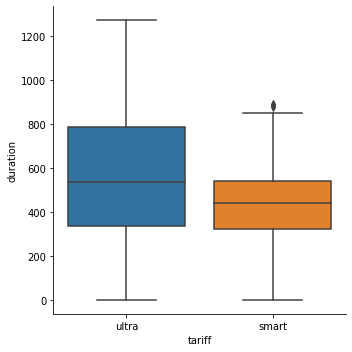

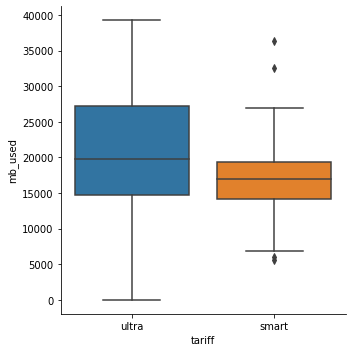

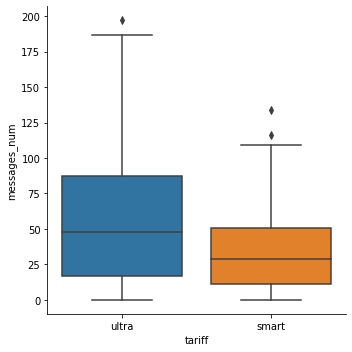

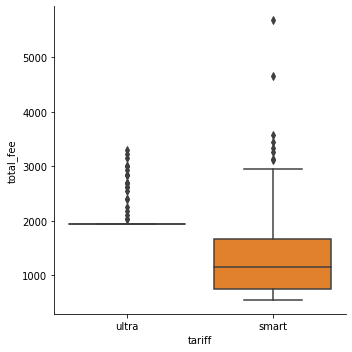

In [113]:
for column in ['duration', 'mb_used', 'messages_num', 'total_fee']:    
    sns.catplot(x="tariff", y=column, kind="box", data=medians, orient='v')

Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.

### Гистограммы

#### Анализ продолжительности звонков

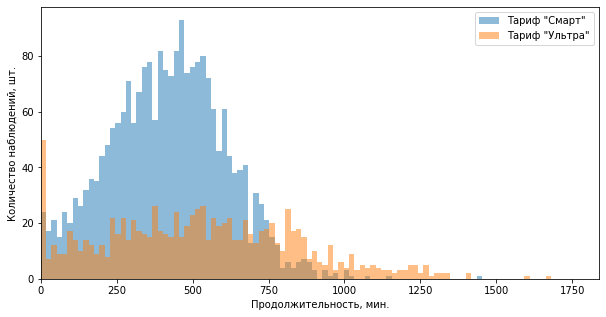

In [114]:
plt.figure(figsize = (10,5))
plt.hist(profit.query('tariff == "smart"')['duration'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 1750))
plt.hist(profit.query('tariff == "ultra"')['duration'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 1750))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Тариф Смарт более массовый по сравнению с тарифом Ультра. Пик на нулевых значениях означает, что пользователи не совершали звонков. По тарифу "Смарт" пиковые значения приходятся на 280, 400 и 470 минут. Пиковое значение по тарифу "Ультра" - 540 минут. Основная масса клиентов совершает звонки в диапазоне от 250 до 870 минут. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем минут находится в левой части, т.е. с более низкими значениями.

#### Анализ сообщений

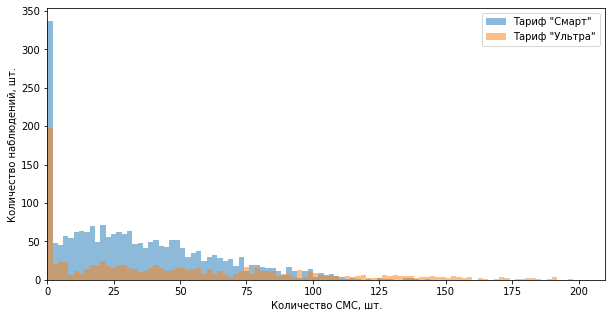

In [115]:
fig = plt.figure(figsize = (10,5))
plt.hist(profit.query('tariff == "smart"')['messages_num'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 200))
plt.hist(profit.query('tariff == "ultra"')['messages_num'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 200))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Количество СМС, шт.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачки на нулях вызваны отсутствием клиентами отправляемых СМС в рамках тарифа. По обоим тарифам почти никто не отправляет более 100 СМС в месяц. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем отправляемых СМС находится в левой части, т.е. с более низкими значениями.

#### Анализ израсходованного интернета

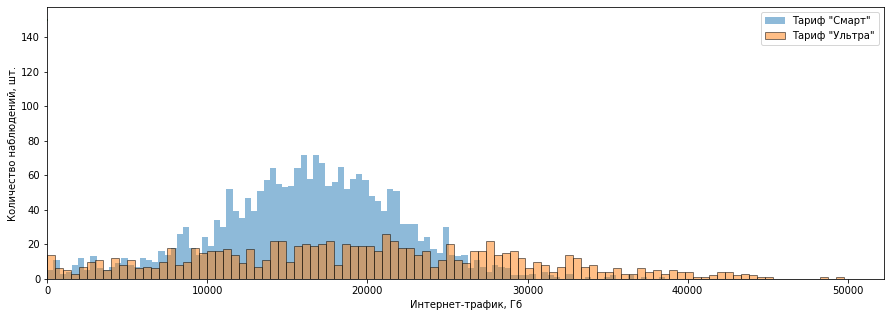

In [116]:
fig = plt.figure(figsize = (15,5))
plt.hist(profit.query('tariff == "smart"')['mb_used'], bins=100, alpha=0.5, label='Тариф "Смарт"')
plt.hist(profit.query('tariff == "ultra"')['mb_used'], bins=100, alpha=0.5, label='Тариф "Ультра"', ec="k")
plt.plot([0, 50], [150, 150],dashes=[2, 2])
plt.xlim(left = 0)
plt.legend(loc='best')
plt.xlabel('Интернет-трафик, Гб')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачков на нулях почти не наблюдается. По тарифу "Смарт" пиковое значение приходятся на 17 Гб. Пиковое значение по тарифу "Ультра" - на 19-21 Гб. Можно отметить, что в целом графики интернет-траффика имеют нормальное распределение с минимальным количеством выбросов.



#### Анализ выручки 

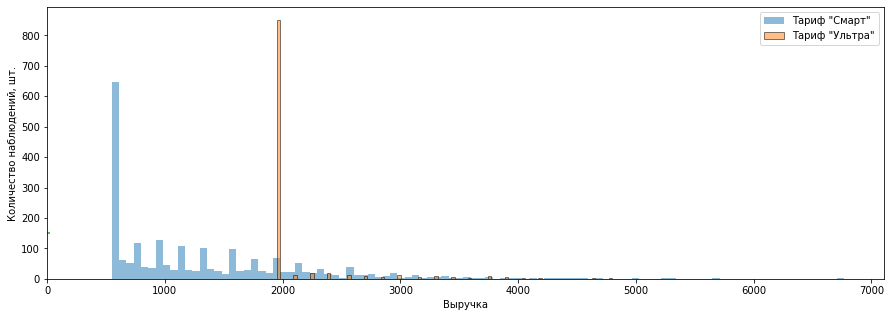

In [117]:
fig = plt.figure(figsize = (15,5))
plt.hist(profit.query('tariff == "smart"')['total_fee'], bins=100, alpha=0.5, label='Тариф "Смарт"')
plt.hist(profit.query('tariff == "ultra"')['total_fee'], bins=100, alpha=0.5, label='Тариф "Ультра"', ec="k")
plt.plot([0, 50], [150, 150],dashes=[2, 2])
plt.xlim(left = 0)
plt.legend(loc='best')
plt.xlabel('Выручка')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

На гистрограмме выраженные пики для абонентских плат тарифов. Выручка выше 3500 редка для обоих тарифов.

In [118]:
print('Суммарная выручка на тарифе "Смарт" составляет - {:.0f}'.format(profit.query('tariff == "smart"')['total_fee'].sum()))
print('Суммарная выручка на тарифе "Ультра" составляет - {:.0f}'.format(profit.query('tariff == "ultra"')['total_fee'].sum()))

Суммарная выручка на тарифе "Смарт" составляет - 2885751
Суммарная выручка на тарифе "Ультра" составляет - 2040000


Тариф "Смарт" приносит выручки больше, чем более дорогой "Ультра".

## Проверка гипотез
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

Критический уровень статистической значимости примем равным 5%.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

H0 - средняя выручка пользователей тарифов «Смарт» и «Ультра» не различается
H1 - средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

In [119]:
alpha=0.05

results = st.ttest_ind(profit.query("tariff=='smart'")['total_fee'],
                       profit.query("tariff=='ultra'")['total_fee'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.9776448000521676e-158
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Смарт» и «Ультра» различается, так как значение статистической  значимости меньше критического уровня статистической значимости.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [120]:
profit_cities=profit.merge(users,how='left',on=['user_id'])
alpha=0.05
results = st.ttest_ind(profit_cities.query('city=="Москва"')['total_fee'],
                       profit_cities.query('city!="Москва"')['total_fee'])
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической  значимости больше критического уровня статистической значимости.

## Общий вывод


Количество минут разговора в месяц на тарифе "Смарт" составляет - 77631, на тарифе "Ультра" - 43227. Количество сообщений в месяц на тарифе "Смарт" составляет - 6201, на тарифе "Ультра" - 4052. Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3033, на тарифе "Ультра" - 1600.

В тарифе "Ультра" практически никто не выходит за рамки пределы лимитов, тогда как в тарифе "Смарт" при стоимости 550 руб. в месяц разброс относительно большой, а мат. ожидание равно 818 руб. Нормальные значения для тарифа "Смарт" от 550 руб. до 1 750 руб., прочие можем считать выбросами. Максимально допустимое значение у тарифа "Смарт" - 5 350 руб. Для тарифа Ultra нормальное значение - цена тарифа, 1 950р.

Проверка гипотезы только подтвердила, что различия в средних неслучайны. Также выявили, что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.